# NYC required energy 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [2]:
# load data
path = '/Users/liamhettinger/Documents/Portfolio_work/Data/nyc_load.csv'
nyc = pd.read_csv(path,index_col='DATE',parse_dates=True)

Temperature column is the average temperature (in degrees Fahrenheit) |
Load column is the average electricity produced (in Watts) in NYC central zone (see the picture below) |

## Data Expolartion

In [3]:
#viewing data
nyc.head()

,temperature,load
DATE,,
2019-01-01,51,1743.769550
2019-01-02,38,1970.869388
2019-01-03,41,1968.927778
2019-01-04,39,1909.855172
2019-01-05,44,1805.748276


In [4]:
#exploring dataframe features
nyc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2019-01-01 to 2019-12-31
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  365 non-null    int64  
 1   load         365 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 8.6 KB


<Axes: xlabel='temperature', ylabel='load'>

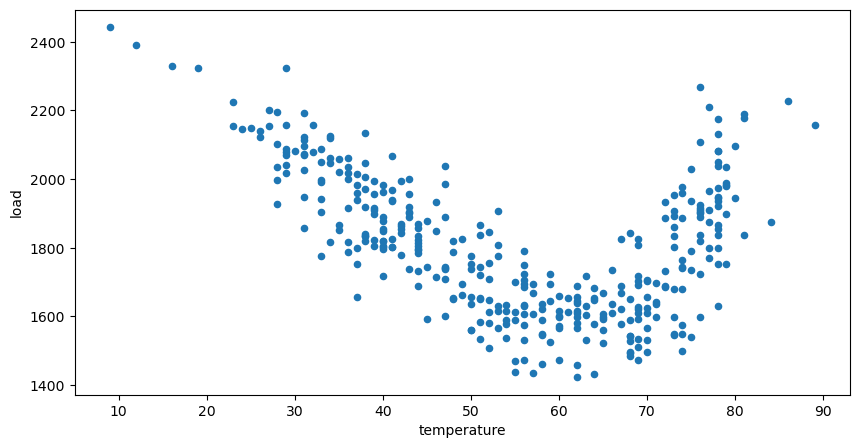

In [5]:
#graph  polynomial regression is the
fig, ax = plt.subplots(figsize=(10,5))
nyc.plot.scatter(x='temperature',y='load',ax=ax)

### Model

In [6]:
#define X and Y variables
y = nyc.drop('temperature', axis = 1)
X = nyc.drop('load', axis = 1)

In [7]:
#splitting X and Y variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
#defining pipeline
pipe= Pipeline(steps=[
    ('scaler', StandardScaler()), # scaling featuer (μ = 0 and σ = 1)
    ('poly',PolynomialFeatures()), #adding polynomial features
    ('linreg', LinearRegression())]) #model

In [9]:
#parameters for adjusting polynomial features
param_grid = [
    {'poly__degree': [2, 3, 4, 5, 6, 7, 8, 9],
     'poly__include_bias': [True,False]}
  ]

In [10]:
#Randomized Search Cv. Gridsearch searchs for all combos. Randomized search tries random combos to reduce training time.
model = RandomizedSearchCV(pipe, param_distributions=param_grid, n_iter=5, cv=5)

In [11]:
#fitting model
model.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('poly', PolynomialFeatures()),
                                             ('linreg', LinearRegression())]),
                   n_iter=5,
                   param_distributions=[{'poly__degree': [2, 3, 4, 5, 6, 7, 8,
                                                          9],
                                         'poly__include_bias': [True, False]}])

In [12]:
#cross validation results
model.cv_results_

{'mean_fit_time': array([0.00926137, 0.00617542, 0.00666919, 0.00661907, 0.00654516]),
 'std_fit_time': array([0.00295111, 0.00021756, 0.00117255, 0.0009303 , 0.00029452]),
 'mean_score_time': array([0.00524454, 0.003373  , 0.00343928, 0.00335813, 0.00345764]),
 'std_score_time': array([0.00148902, 0.00014711, 0.00014556, 0.00018675, 0.00015245]),
 'param_poly__include_bias': masked_array(data=[False, False, True, True, True],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_poly__degree': masked_array(data=[7, 8, 9, 3, 4],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'poly__include_bias': False, 'poly__degree': 7},
  {'poly__include_bias': False, 'poly__degree': 8},
  {'poly__include_bias': True, 'poly__degree': 9},
  {'poly__include_bias': True, 'poly__degree': 3},
  {'poly__include_bias': True, 'poly__degree': 4}],
 'split0_test_score': array

In [13]:
#best polynomial parameters
model.best_params_

{'poly__include_bias': True, 'poly__degree': 3}

In [14]:
#predicting y_test variables
y_test_pred = model.predict(X_test)

### Model Evaluation

In [16]:
#mean 
mean_squared_error(y_test,y_test_pred)

9679.294343000984

In [17]:
mean_absolute_percentage_error(y_test,y_test_pred)

0.041614134283222914

In [18]:
mean_absolute_error(y_test,y_test_pred)

74.71799519837275

## Visualising model fitting

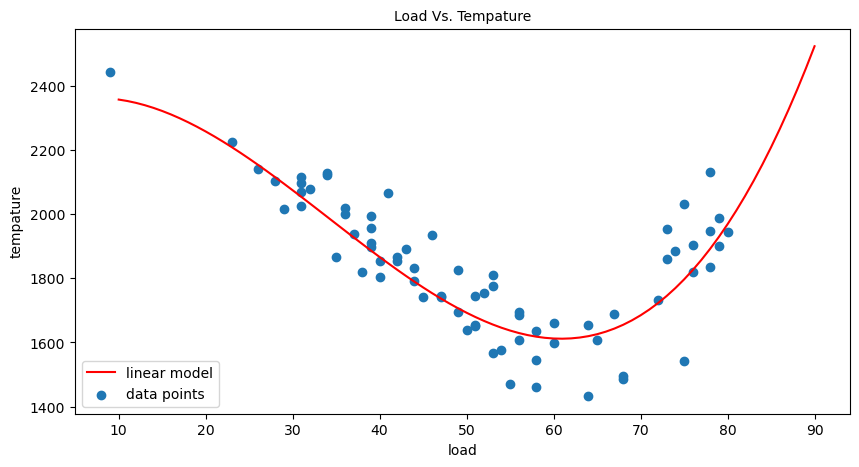

In [19]:
x_plot = pd.DataFrame({'temperature':range(10,91)}) #np.linspace(10,100,90).reshape(90,1)
y_plot = model.predict(x_plot)

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(x_plot,y_plot, c='red', label='linear model')

ax.scatter(X_test,y_test, label='data points')
ax.set_xlabel('load',fontsize=10)
ax.set_ylabel('tempature',fontsize=10)
ax.set_title('Load Vs. Tempature',fontsize=10)
ax.legend(fontsize=10)